In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import math
import statistics
import warnings
import numpy as  np
import ast
import re
from scipy.signal import resample
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
warnings.filterwarnings('ignore')

df = pd.read_json(r"C:\Users\veoni\Documents\GitHub\MTE_DLAB\Squircle experiment\DF_clean.json")
df = df[(df['block_number'] != 'Training')]
df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control') & (df['acc'] != 'NAN')]

# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)
df = df.drop('Unnamed: 0', axis=1, errors='ignore')
#shortened df
df_comp = df[['pt_num','trial_nbr','block_number', 'acc', 'choice', 'true_value', 'difficulty', 'rt', 'previous_response', 'downsampled_traj', 'timestamps']].copy()

In [2]:
# Calculate average accuracy and reaction time by difficulty level
avg_stats = df_acc.groupby(['difficulty', 'true_value'] ).agg({'acc': 'mean', 'rt': 'mean'}).reset_index()
print(avg_stats)

  difficulty true_value       acc        rt
0       Easy       Blue  0.864674  0.460808
1       Easy        Red  0.841806  0.467413
2       Hard       Blue  0.715600  0.480877
3       Hard        Red  0.667774  0.493310
4     Medium       Blue  0.785950  0.471630
5     Medium        Red  0.752135  0.478263


### Preprocessing

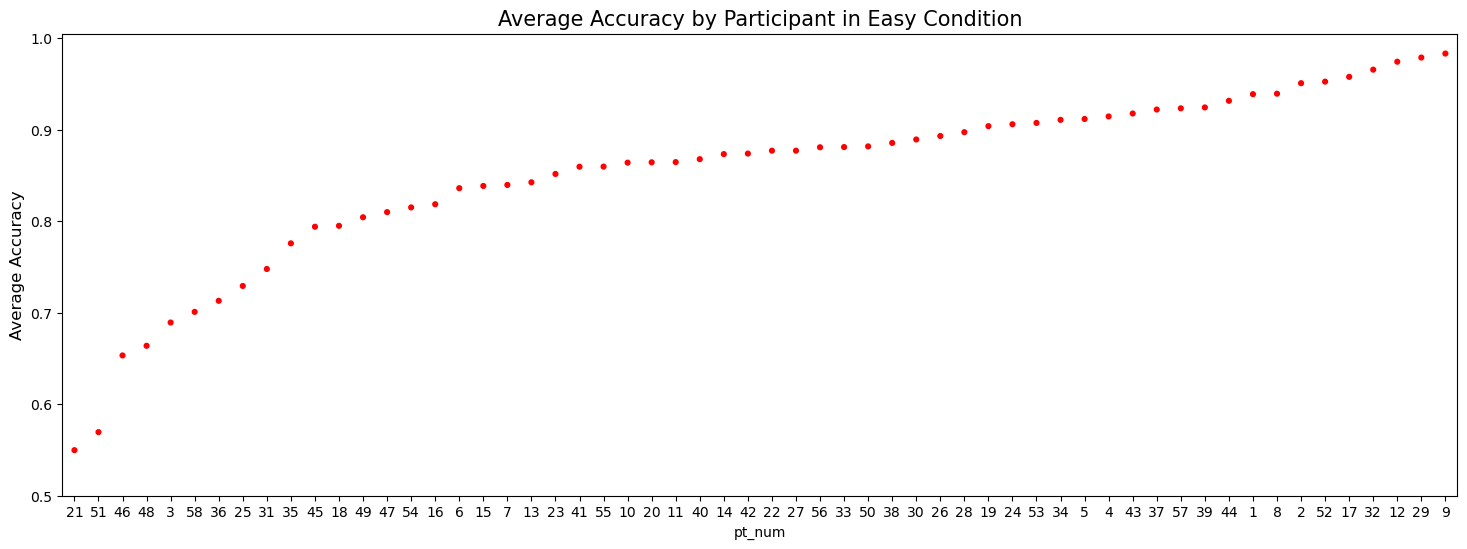

In [3]:
# Calculate the average accuracy per participant and plotting the results
avg_stats_pt = df_acc.groupby(['pt_num', 'difficulty']).agg({'acc': 'mean'}).reset_index()
avg_stats_pt_easy = avg_stats_pt[avg_stats_pt['difficulty'] == 'Easy']
avg_stats_pt_easy_sorted = avg_stats_pt_easy.sort_values('acc', ascending=True)

# Plotting the results
# Add pt_num numbers next to the points

# Plotting the results
plt.figure(figsize=(18, 6))  # Increase the size of the figure

ax = sns.pointplot(data=avg_stats_pt_easy_sorted, x='pt_num', y='acc', color='red', order=avg_stats_pt_easy_sorted['pt_num'], join=False, scale=0.5)
ax.set_title('Average Accuracy by Participant in Easy Condition', fontsize=15)  # Add the title
# Adjust the font size of y-axis labels
ax.set_ylabel('Average Accuracy', fontsize=12)
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # Set the y-axis range



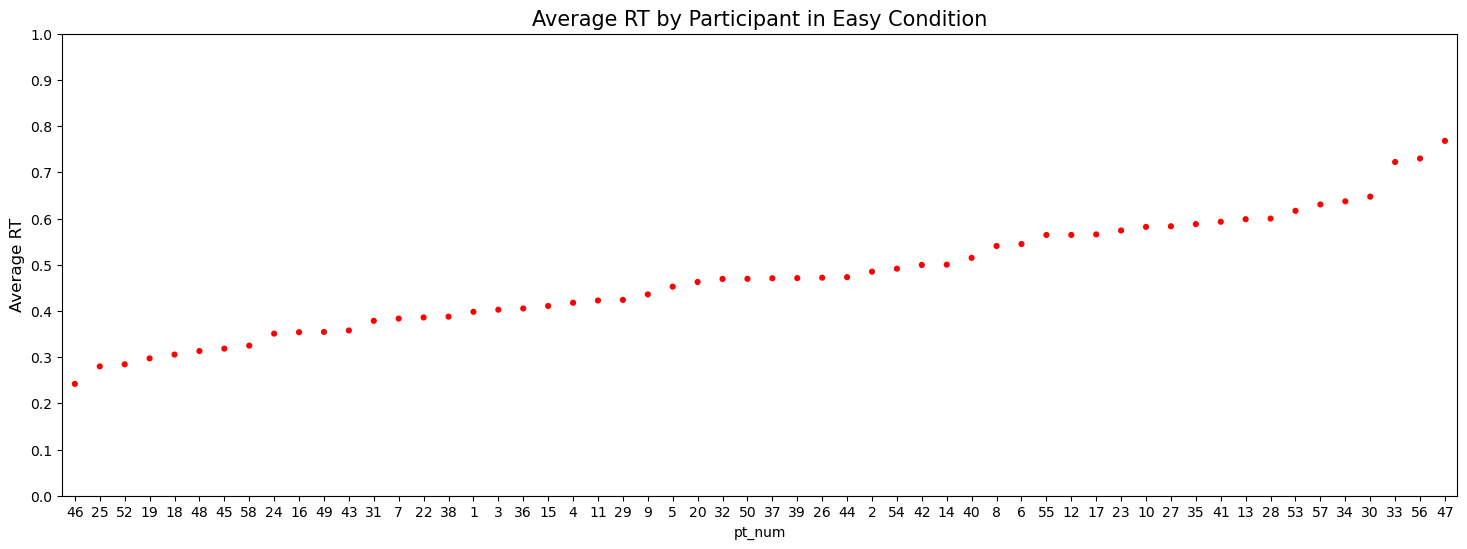

In [4]:
#Removing partcipants 21 and 51
# Doing the same procedure for RT.
df_filtered = df_comp[(df_comp['pt_num'] != 21) & (df_comp['pt_num'] != 51)]

avg_stats_rt = df_filtered.groupby(['pt_num', 'difficulty']).agg({'rt': 'mean'}).reset_index()
avg_stats_rt_easy = avg_stats_rt[avg_stats_rt['difficulty'] == 'Easy']
avg_stats_rt_easy_sorted = avg_stats_rt_easy.sort_values('rt', ascending=True)
plt.figure(figsize=(18, 6))  # Increase the size of the figure

ax = sns.pointplot(data=avg_stats_rt_easy_sorted, x='pt_num', y='rt', color='red', order=avg_stats_rt_easy_sorted['pt_num'], join=False, scale=0.5)
ax.set_title('Average RT by Participant in Easy Condition', fontsize=15)  # Add the title
# Adjust the font size of y-axis labels
ax.set_ylabel('Average RT', fontsize=12)
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # Set the y-axis range

0.101161609


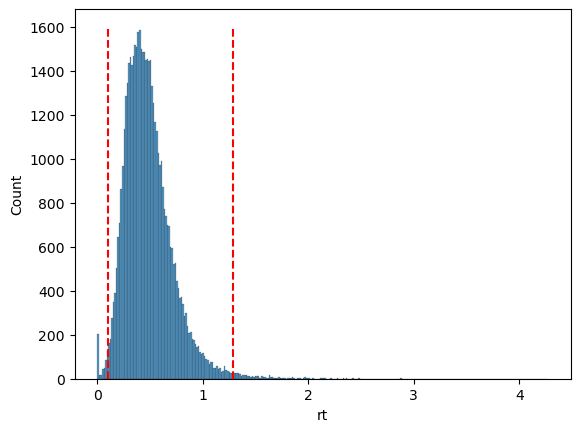

In [5]:
#Participant based Rts does not show striking differences between participants.
# We do quantile based rejection to cope with the outliers.
# Quantile based plotting
q1 = df_filtered['rt'].quantile(0.99)
q2 = df_filtered['rt'].quantile(0.01)
print(q2)
sns.histplot(data=df_filtered, x='rt')
plt.vlines(q1, 0, 1600, color='red', linestyle='--')
plt.vlines(q2, 0, 1600, color='red', linestyle='--')

<Axes: xlabel='rt', ylabel='Count'>

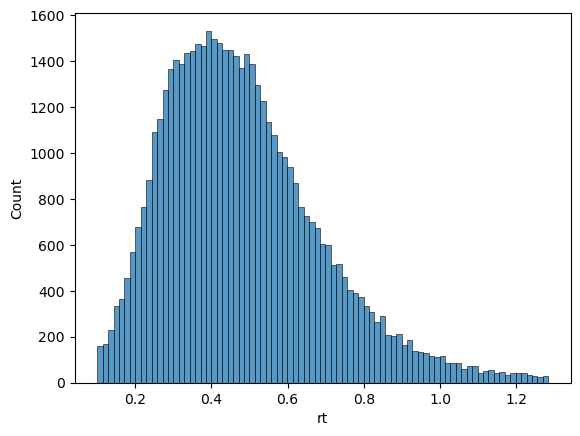

In [6]:
# Filtering the data q1 around 100ms and q2 around 2sec
df_filtered = df_filtered[(df_filtered['rt'] >= q2) & (df_filtered['rt'] <= q1)]
# Next we plot the data again to see if the outliers are removed
sns.histplot(data=df_filtered, x='rt')


### Manual Preprocessing


Index 48001 accepted.
Index 48002 accepted.
Index 48003 accepted.
Index 48004 accepted.
Index 48005 accepted.
Index 48006 accepted.
Index 48007 rejected.
Index 48008 rejected.
Index 48009 rejected.
Index 48010 accepted.
Index 48011 accepted.
Index 48012 accepted.
Index 48013 accepted.
Index 48014 accepted.
Index 48015 rejected.
Index 48016 accepted.
Index 48017 accepted.
Index 48018 accepted.
Index 48019 rejected.
Index 48020 accepted.
Index 48021 rejected.
Index 48022 accepted.
Index 48023 accepted.
Index 48024 accepted.
Index 48025 accepted.
Index 48026 accepted.
Index 48027 accepted.
Index 48028 accepted.
Index 48029 accepted.
Index 48030 accepted.
Index 48031 accepted.
Index 48032 accepted.
Index 48033 accepted.
Index 48034 accepted.
Index 48035 accepted.
Index 48036 accepted.
Index 48037 rejected.
Index 48038 accepted.
Index 48039 accepted.
Index 48040 accepted.
Index 48041 accepted.
Index 48042 accepted.
Index 48043 accepted.
Index 48044 accepted.
Index 48045 accepted.
Index 4804

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\veoni\anaconda3\envs\DLAB\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\veoni\AppData\Local\Temp\ipykernel_9980\152581752.py", line 82, in previous_trial
    df_manrev = df_manrev.drop(df_manrev.index[-1])
UnboundLocalError: local variable 'df_manrev' referenced before assignment


Index 48897 accepted.
Index 48898 accepted.
Index 48899 accepted.
Index 48900 accepted.
Index 48901 accepted.
Index 48902 accepted.
Index 48903 accepted.
Index 48904 accepted.
Index 48905 accepted.
Index 48906 accepted.
Index 48907 accepted.
Index 48908 accepted.
Index 48909 accepted.
Index 48910 accepted.
Index 48911 accepted.
Index 48912 accepted.
Index 48913 accepted.
Index 48914 accepted.
Index 48915 accepted.
Index 48916 accepted.
Index 48917 accepted.
Index 48918 accepted.
Index 48919 accepted.
Index 48920 accepted.
Index 48921 accepted.
Index 48922 accepted.
Index 48923 accepted.
Index 48924 accepted.
Index 48925 accepted.
Index 48926 accepted.
Index 48927 accepted.
Index 48928 accepted.
Index 48929 accepted.
Index 48930 accepted.
Index 48931 accepted.
Index 48932 accepted.
Index 48933 accepted.
Index 48934 accepted.
Index 48935 accepted.
Index 48936 accepted.
Index 48937 accepted.
Index 48938 accepted.
Index 48939 accepted.
Index 48940 accepted.
Index 48941 accepted.
Index 4894

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\veoni\anaconda3\envs\DLAB\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\veoni\AppData\Local\Temp\ipykernel_9980\152581752.py", line 82, in previous_trial
    df_manrev = df_manrev.drop(df_manrev.index[-1])
UnboundLocalError: local variable 'df_manrev' referenced before assignment


Index 49012 accepted.
Index 49013 accepted.
Index 49014 accepted.
Index 49015 accepted.
Index 49016 accepted.
Index 49017 accepted.
Index 49018 accepted.
Index 49019 accepted.
Index 49020 accepted.
Index 49021 accepted.
Index 49022 accepted.
Index 49023 accepted.
Index 49024 accepted.
Index 49025 accepted.
Index 49026 accepted.
Index 49027 accepted.
Index 49028 accepted.
Index 49029 accepted.
Index 49030 accepted.
Index 49031 accepted.
Index 49032 accepted.
Index 49033 accepted.
Index 49034 accepted.
Index 49035 accepted.
Index 49036 accepted.
Index 49037 accepted.
Index 49038 accepted.
Index 49039 accepted.
Index 49040 accepted.
Index 49041 accepted.
Index 49042 accepted.
Index 49043 accepted.
Index 49044 accepted.
Index 49045 accepted.
Index 49046 accepted.
Index 49047 accepted.
Index 49048 accepted.
Index 49049 accepted.
Index 49050 accepted.
Index 49051 accepted.
Index 49052 accepted.
Index 49053 accepted.
Index 49054 accepted.
Index 49055 accepted.
Index 49056 accepted.
Index 4905

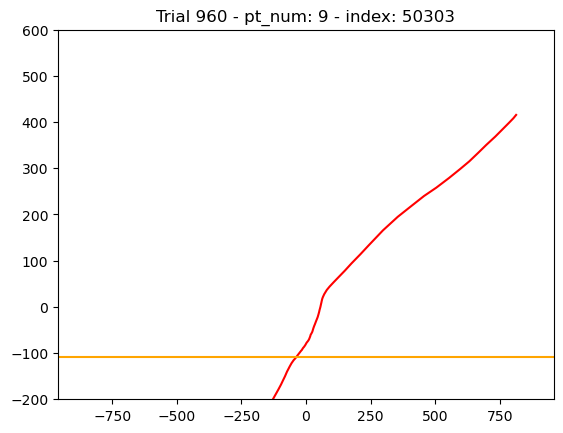

In [12]:
df_manrev = pd.read_json(r"C:\Users\veoni\Documents\GitHub\MTE_DLAB\Analysis\DF_manrev.json")
#df_manrev = pd.DataFrame(columns=['pt_num', 'trial_nbr', 'block_number', 'acc', 'choice', 'true_value', 'difficulty', 'rt', 'previous_response', 'downsampled_traj', 'timestamps'])
class TrialViewer:
    def __init__(self, df_filtered):
        self.df_filtered = df_filtered
        self.current_index = 48001

        self.root = tk.Tk()
        self.root.title("Trial Viewer")

        self.label = tk.Label(self.root, text="Trial: 0")
        self.label.pack()

        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.figure, master=self.root)
        self.canvas.get_tk_widget().pack()

        self.reject_button = tk.Button(self.root, text="Reject (F)", command=self.reject_trial)
        self.reject_button.pack(side=tk.LEFT)
        self.reject_button.bind("<F>", self.reject_trial)  # Bind 'F' key

        self.accept_button = tk.Button(self.root, text="Accept (J)", command=self.accept_trial)
        self.accept_button.pack(side=tk.LEFT)
        self.accept_button.bind("<J>", self.accept_trial)  # Bind 'J' key

        self.previous_button = tk.Button(self.root, text="Previous", command=self.previous_trial)
        self.previous_button.pack(side=tk.LEFT)

        self.next_button = tk.Button(self.root, text="Next", command=self.next_trial)
        self.next_button.pack(side=tk.LEFT)

        self.show_current_trial()
        
        # Set focus on the root window to capture keyboard events
        self.root.focus_set()

        # Bind keyboard shortcuts
        self.root.bind("<Key>", self.key_pressed)

        self.root.mainloop()

    def show_current_trial(self):
        trial_data = self.df_filtered.iloc[self.current_index]['downsampled_traj']
        pt_num = self.df_filtered.iloc[self.current_index]['pt_num']  # Get pt_num
        choice = self.df_filtered.iloc[self.current_index]['choice']  
        trial_nbr = self.df_filtered.iloc[self.current_index]['trial_nbr']
        self.ax.clear()
        x_coords = [pos[0] for pos in trial_data]
        y_coords = [pos[1] for pos in trial_data]
        if choice == 'Red':
            self.ax.plot(x_coords, y_coords, color='red')  # Plot each segment in red
        elif choice == 'Blue':
            self.ax.plot(x_coords, y_coords, color='blue')  # Plot each segment in blue
        self.ax.set_xlim(-960, 960)
        self.ax.set_ylim(-200, 600)
        self.ax.hlines(-108, -960, 960, color='orange')  # Add a vertical line at the center
        self.ax.set_title("Trial {} - pt_num: {} - index: {}".format(trial_nbr, pt_num, self.current_index))  # Update title
        self.canvas.draw_idle()
        self.label.config(text="Trial: {}".format(self.current_index))

    def reject_trial(self, event=None):
        # Implement what happens when the trial is rejected
        print("Index {} rejected.".format(self.current_index))
        self.next_trial()

    def accept_trial(self, event=None):
        # Implement what happens when the trial is accepted
        print("Index {} accepted.".format(self.current_index))
        # Add accepted trial to your new dataframe (e.g., df_manrev)
        accepted_trial = self.df_filtered.iloc[self.current_index]
        # Do something with accepted_trial, e.g., 
        global df_manrev
        df_manrev = df_manrev._append(accepted_trial, ignore_index=True)

        # Show the next trial
        self.next_trial()

    def previous_trial(self):
        if self.current_index > 0:
            self.current_index -= 1
            self.show_current_trial()
            df_manrev = df_manrev.drop(df_manrev.index[-1])

    def next_trial(self):
        if self.current_index < len(self.df_filtered) - 1:
            self.current_index += 1
            self.show_current_trial()
    def key_pressed(self, event):
            if event.char.lower() == 'f':
                self.reject_trial()
            elif event.char.lower() == 'j':
                self.accept_trial()
# Example usage:
# Assuming df_filtered is your filtered DataFrame
# You need to have matplotlib installed for plotting
app = TrialViewer(df_filtered)
#print(TrialViewer.self.current_index)
df_manrev.to_json(r"C:\Users\veoni\Documents\GitHub\MTE_DLAB\Analysis\DF_manrev.json")

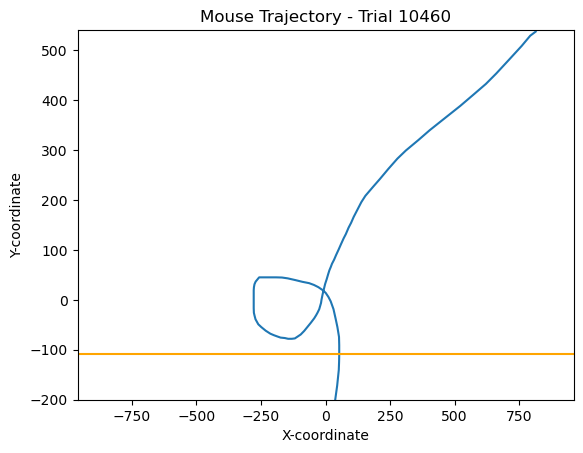

In [9]:
import matplotlib.pyplot as plt

# Get the mouse trajectory data for trial 10460
trajectory = df_filtered['downsampled_traj'].iloc[14936]

# Extract x and y coordinates from the trajectory data
x_coords = [pos[0] for pos in trajectory]
y_coords = [pos[1] for pos in trajectory]

# Plot the mouse trajectory
plt.plot(x_coords, y_coords)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.xlim(-960, 960)
plt.ylim(-200, 540)
plt.hlines(-108, -960, 960, color='orange')  # Add a vertical line at the center
plt.title('Mouse Trajectory - Trial 10460')
plt.show()


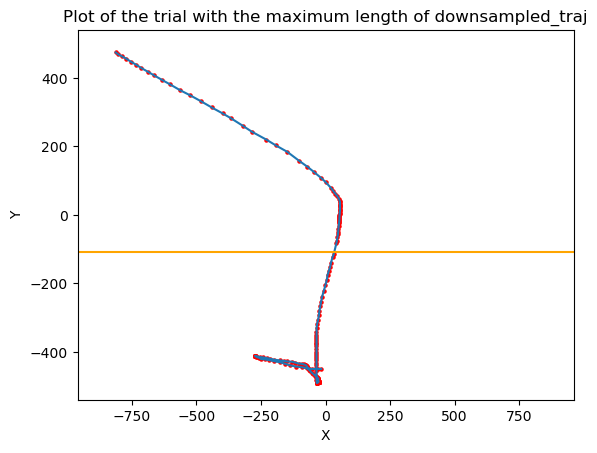

In [7]:
mean_data_points = df_filtered['downsampled_traj'].apply(lambda x: len(x)).mean()
print(mean_data_points)

df_filtered['new_timestamps'] = df_filtered['timestamps']

df_filtered['new_timestamps'] = df_filtered['downsampled_traj'].apply(lambda x: [i * 0.01 for i in range(len(x))])



118.13885575699746


In [8]:
avg_timestamps = df_filtered['new_timestamps'].apply(lambda x: np.mean(x)).mean()
df_filtered['new_timestamps'][0][59]

def cut_and_fill_traj(traj, length=60, before=10):
    start_index = None
    for i, (x, y) in enumerate(traj):
        if y >= -108:
            start_index = i
            break
    
    if start_index is None:
        return traj[:length]
    beg_index = start_index - before
    end_index = start_index + length
    traj = traj[beg_index:end_index]
    
    if len(traj) < length:
        traj.extend([(float('NAN'), float('NAN'))] * (length - len(traj)))
    
    return traj

tri1 = cut_and_fill_traj(df_filtered['downsampled_traj'][45678], length=80, before=10)
len(tri1)

90

In [9]:
df_filtered['match_traj'] = df_filtered['downsampled_traj'].apply(cut_and_fill_traj)


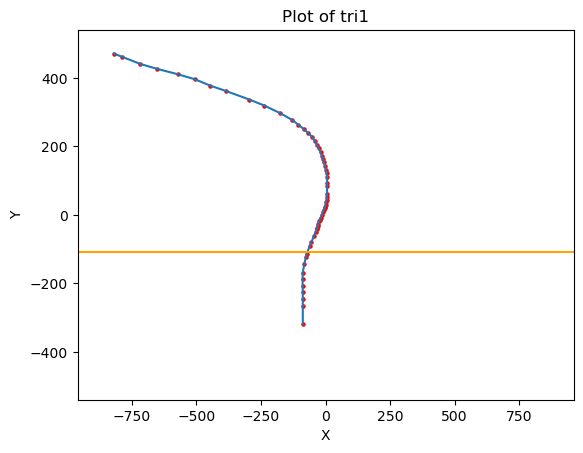

In [10]:
import matplotlib.pyplot as plt

x_coords = [pos[0] for pos in df_filtered['match_traj'][4568]]
y_coords = [pos[1] for pos in df_filtered['match_traj'][4568]]

plt.scatter(x_coords, y_coords, color='red', s=5)
plt.plot(x_coords, y_coords)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-960, 960)
plt.ylim(-540, 540)
plt.hlines(-108, -960, 960, color='orange')
plt.title('Plot of tri1')
plt.show()


In [10]:
def cut_off_trajectory(traj):
    return [pos for pos in traj if pos[1] >= -108]

df_filtered['cut_traj'] = df_filtered['downsampled_traj'].apply(cut_off_trajectory)


TypeError: complex() first argument must be a string or a number, not 'list'

In [ ]:
""" ### SCRAPPED!!!!

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_filtered['pt_num'].unique())

# Loop through each participant
for participant_num in participant_numbers:
    # Create a new figure for each participant
    plt.figure(figsize=(12, 6))

    subset_data_list = []
    conditions = [('Easy', 'Blue'),
                  ('Medium', 'Blue'),
                  ('Hard', 'Blue'),
                  ('Control', 'Control'),
                  ('Hard', 'Red'),
                  ('Medium', 'Red'),
                  ('Easy', 'Red')]

    for j, (difficulty, true_color) in enumerate(conditions, 1):
        subset_data = df_filtered[(df_filtered['difficulty'] == difficulty) & (df_filtered['true_value'] == true_color) & (df_filtered['pt_num'] == participant_num)]
        probabilities = subset_data['choice'].value_counts(normalize=True).get('Red', 0)

        subset_data_list.append({'Condition': f'{difficulty} {true_color}', 'Probability of Red': probabilities})

    # Create a DataFrame from the list
    plot_data = pd.DataFrame(subset_data_list)

    # Plotting using sns.pointplot
    sns.pointplot(x='Condition', y='Probability of Red', data=plot_data, order=[f'{c[0]} {c[1]}' for c in conditions])

    # Set the title and labels
    plt.title(f'Psychometric Functions - Participant {participant_num}')
    plt.xlabel('Condition')
    plt.ylabel('Probability of Red')
    plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
    

    # Show the plot
    plt.savefig(f'Participant_{participant_num}_psychometric_function.png')
 """

In [ ]:
# Optional: Pruning the trajectories if out of bounds
# This function takes a DataFrame and returns a list of pruned trajectories (i.e., trajectories that are within the specified x and y cutoffs)
def prune_trajectories(df, x_cutoff=390, y_cutoff=810):
    pruned_trajectories = []

    for traj in df['downsampled_traj']:
        pruned_traj = [(x, y) for x, y in traj if abs(x) <= x_cutoff and y <= y_cutoff]
        pruned_trajectories.append(pruned_traj)

    return pruned_trajectories

# Assuming df_comp is your DataFrame
pruned_trajectories = prune_trajectories(df_comp)

df_bnd = prune_trajectories(df_filtered)

TypeError: 'int' object is not iterable

In [8]:
org_len= 50304
# Optional: filter the trajectories
# Filtering out the trajectories that are not increasing in terms of y axis
def cut_off_trajectory(traj):
    return [pos for pos in traj if pos[1] >= -108]

df_filtered['cut_traj'] = df_filtered['downsampled_traj'].apply(cut_off_trajectory)


shifted_value = y_values.shift() #should be previous
value = y_values

sum(all(shifted_value < value) 

sum(1,2,3)

    
def filter_trajectories(df, tolerance=20):
    filtered_rows = []

    for index, row in df.iterrows():
        y_values = [point[1] for point in row['cut_traj']]
        is_increasing = all(y_values[i] <= y_values[i + 1] + tolerance for i in range(len(y_values) - 1))
        
        if is_increasing:
            filtered_rows.append(row)

    filtered_df = pd.DataFrame(filtered_rows)
    return filtered_df
# Assuming df_comp is your DataFrame
#df_filtered = filter_trajectories(df_filtered, tolerance=20)

total_trials = len(df_filtered)
tol_vals = []
for i in range(1, 100):
    df_filtered1 = filter_trajectories(df_filtered, tolerance=i)
    excluded_trials = 50304 - len(df_filtered1)
    proportion_excluded = excluded_trials / 50304  # Calculate proportion
    tol_vals.append((i, proportion_excluded))

plt.bar([i[0] for i in tol_vals], [i[1] for i in tol_vals])
plt.xlabel('Tolerated pixel decrease')
plt.ylabel('Proportion of Excluded Trials')
plt.show()

SyntaxError: '(' was never closed (189209360.py, line 13)

### Big plot

In [ ]:
# Set the style of seaborn
sns.axes_style()
# Define a color-blind friendly palette with distinct patterns for Easy, Medium, Hard, and Control
palette = sns.color_palette("colorblind", 4)

# Specify the order of difficulty conditions excluding 'Control'
difficulty_order_acc = ['Easy', 'Medium', 'Hard']

# Conditions for the new plot
conditions = [('Easy', 'Blue'),
              ('Medium', 'Blue'),
              ('Hard', 'Blue'),
              ('Control', 'Control'),
              ('Hard', 'Red'),
              ('Medium', 'Red'),
              ('Easy', 'Red')]

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Loop through each participant
for i, participant_num in enumerate(participant_numbers):
    sns.axes_style()
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Calculate the average accuracy and 'Red' choice ratio per block for the current participant
    avg_accuracy_per_block = (participant_data[participant_data['difficulty'] != 'Control']
                              .groupby(['block_number', 'difficulty'])['acc']
                              .mean()
                              .reset_index())

    red_choice_ratio_per_block = (participant_data[participant_data['choice'] == 'Red']
                                  .groupby(['block_number', 'difficulty'])['choice']
                                  .count() / participant_data.groupby(['block_number', 'difficulty'])['choice'].count()).reset_index()

    # Extract and sort the numeric part of block numbers
    avg_accuracy_per_block['block_number'] = avg_accuracy_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))
    red_choice_ratio_per_block['block_number'] = red_choice_ratio_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sort the DataFrame by block number and difficulty
    avg_accuracy_per_block = avg_accuracy_per_block.sort_values(by=['block_number', 'difficulty'])
    red_choice_ratio_per_block = red_choice_ratio_per_block.sort_values(by=['block_number', 'difficulty'])

    # Plot 0: Average Accuracy per Block
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(24, 16))

    sns.pointplot(x="block_number", y="acc", hue="difficulty", data=avg_accuracy_per_block, palette=palette, markers="o", linestyles="-", ax=axs[0, 0], join=True)
    overall_avg_accuracy = (participant_data[participant_data['difficulty'] != 'Control'].groupby('block_number')['acc'].mean().reset_index())
    sns.pointplot(x="block_number", y="acc", data=overall_avg_accuracy, color='black', ax=axs[0, 0], label='Overall Average')
    axs[0, 0].set_xlabel("Block Number")
    axs[0, 0].set_ylabel("Average Accuracy")
    axs[0, 0].set_yticks([0,0.25,0.50,0.75,1.0])
    axs[0, 0].set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    axs[0, 0].tick_params(axis='y', labelcolor=palette[0])
    axs[0, 0].set_title(f"Avg Accuracy per Block - Participant {participant_num}")
    axs[0, 0].legend(title='Difficulty', loc='lower left')

    # Plot 1: 'Red' Choice Ratio per Block
    ax2 = axs[0, 1]
    sns.pointplot(x="block_number", y="choice", data=red_choice_ratio_per_block, color='red', ci=None, markers="x", linestyles="--", ax=ax2, join=False)
    ax2.set_ylabel("'Red' Choice Ratio")
    ax2.set_yticks([0,0.25,0.50,0.75,1.0])
    ax2.set_ylim(0, 1)  # Assuming choice ratio values are between 0 and 1
    ax2.tick_params(axis='y', labelcolor=palette[1])

    # Plot 2: Reaction Time by Trial Number
    sns.scatterplot(x="trial_nbr", y="rt", hue="difficulty", data=participant_data, palette=palette, markers="x", linestyles="-", ax=axs[1, 0])
    axs[1, 0].set_xlabel("Trial Number")
    axs[1, 0].set_ylabel("Reaction Time (rt)")
    axs[1, 0].set_ylim(0, 5)
    axs[1, 0].set_title(f"Reaction Time by Trial Number - Participant {participant_num}")

    # Add a legend for the difficulty conditions
    axs[1, 0].legend(title='Difficulty', loc='upper right')

    # Plot 3: Average Accuracy per Difficulty (excluding 'Control')
    sns.pointplot(x="difficulty", y="acc", data=avg_accuracy_per_block, palette=palette[:-1], order = ['Easy', 'Medium', 'Hard'], markers="o", linestyles="-", ax=axs[1, 1], join=True)
    axs[1, 1].set_xlabel("Difficulty")
    axs[1, 1].set_ylabel("Average Accuracy")
    axs[1, 1].set_yticks([0,0.25,0.50,0.75,1.0])
    axs[1, 1].set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    axs[1, 1].tick_params(axis='y', labelcolor=palette[0])
    axs[1, 1].set_title(f"Avg Accuracy per Difficulty - Participant {participant_num}")

    
    #sns.set_style("whitegrid", {"grid.color": ".001", "grid.linestyle": ":"})
    # Plot 4: Reaction Time per Difficulty (including 'Control')
    sns.pointplot(x="difficulty", y="rt", data=participant_data, palette=palette, markers="x",order = ['Easy', 'Medium', 'Hard', 'Control'], linestyles="-", ax=axs[2, 0])
    axs[2,0].set_ylabel('RT')
    
    # Plot 5: Probability of Choosing Red for Each Condition
    #sns.set_style("whitegrid", {"grid.color": ".001", "grid.linestyle": ":"})
    ax5 = axs[2, 1]  # Twin Axes for the new plot
    subset_data_list = []

    for j, (difficulty, true_color) in enumerate(conditions, 1):
        subset_data = participant_data[(participant_data['difficulty'] == difficulty) & (participant_data['true_value'] == true_color)]
        probabilities = subset_data['choice'].value_counts(normalize=True).get('Red', 0)

        subset_data_list.append({'Condition': f'{difficulty} {true_color}', 'Probability of Red': probabilities})

    # Create a DataFrame from the list
    plot_data = pd.DataFrame(subset_data_list)

    # Plotting using sns.pointplot
    sns.pointplot(x='Condition', y='Probability of Red', data=plot_data, order=[f'{c[0]} {c[1]}' for c in conditions], ax=ax5)
    ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    ax5.set_title('Probability of Choosing Red for Each Condition')
    ax5.set_xlabel('Condition')
    ax5.set_yticks([0,0.25,0.50,0.75,1.0])
    ax5.set_ylabel('Probability of Choosing Red')
    
    #Plot-6
    #sns.set_style("whitegrid", {"grid.color": ".001", "grid.linestyle": ""})
        # Filter data for each difficulty level
    easy_data = participant_data[participant_data['difficulty'] == 'Easy']
    medium_data = participant_data[participant_data['difficulty'] == 'Medium']
    hard_data = participant_data[participant_data['difficulty'] == 'Hard']
    control_data = participant_data[participant_data['difficulty'] == 'Control']
    
    # Group data by block number and count the number of trials
    easy_counts = easy_data['block_number'].value_counts().sort_index()
    medium_counts = medium_data['block_number'].value_counts().sort_index()
    hard_counts = hard_data['block_number'].value_counts().sort_index()
    control_counts = control_data['block_number'].value_counts().sort_index()
    df_counts = pd.DataFrame({
    'Easy': easy_counts,
    'Medium': medium_counts,
    'Hard': hard_counts,
    'Control': control_counts})
    df_counts_reset = df_counts.reset_index()
    sns.pointplot(data=df_counts_reset.melt(id_vars='block_number', var_name='Difficulty', value_name='Number of Trials'),
              x='block_number', y='Number of Trials', hue='Difficulty',
              palette=['blue', 'green', 'orange', 'gray'], markers='o', linestyles='-',join = False, ax=axs[3,0])
    # Set labels and title
    axs[3,0].set_xlabel("Block Number")
    axs[3,0].set_ylabel("Number of Trials")
    axs[3,0].set_title("Number of Trials per Difficulty Level and Block")
    axs[3,0].set_yticks([0,25,50])
    """"
    # PLOT-7
    participant_data['pruned_traj'] = ""
    for i in range(len(participant_data['mtch_traj'])):
        ms_traj = participant_data['mtch_traj'].iloc[i]
        pruned_traj = [[x, y] for x, y in ms_traj if y >= -108]
        participant_data['pruned_traj'].iloc[i] = pruned_traj
    
    df_blue = participant_data[participant_data['choice'] == 'Blue']
    df_red = participant_data[participant_data['choice'] == 'Red']
    
    # Plot Blue Trajectories
    for z in range(len(df_blue)):
        x_coords = [pos[0] for pos in df_blue['pruned_traj'].iloc[z]]
        y_coords = [pos[1] for pos in df_blue['pruned_traj'].iloc[z]]
    
        sns.lineplot(x=x_coords, y=y_coords, label='Mouse Trajectory', color='blue', alpha=0.2, ax=axs[3, 1])
    
    # Plot Red Trajectories
    for b in range(len(df_red)):
        x_red_coords = [pos[0] for pos in df_red['pruned_traj'].iloc[b]]
        y_red_coords = [pos[1] for pos in df_red['pruned_traj'].iloc[b]]
    
        sns.lineplot(x=x_red_coords, y=y_red_coords, label='Mouse Trajectory', color='red', alpha=0.2,ax=axs[3, 1])
    
    # Add labels and title
    axs[3, 1].set_xlabel('X Position')
    axs[3, 1].set_ylabel('Y Position')
    axs[3, 1].set_title('Mouse Trajectory')
    
    # Set x-axis limits to show the left side of the screen
    axs[3, 1].set_xlim(-960, 960)
    axs[3, 1].set_ylim(-500, 500)  # Assuming max(x_coords) is the rightmost position
    axs[3, 1].hlines(-108, xmin=-800, xmax=800, colors='orange')
    axs[3, 1].legend_ = None
    
    # PLOT-8
    red_trajectories = df_red['pruned_traj'] # List of mouse trajectories for red responses
    blue_trajectories = df_blue['pruned_traj']  # List of mouse trajectories for blue responses
    blue_trajectories = np.array(blue_trajectories)
    red_trajectories = np.array(red_trajectories)

# Compute the average resampled trajectory for blue responses
    blue_blue_average_trajectory = np.mean(blue_trajectories, axis=0)

# Compute the average resampled trajectory for red responses
    red_red_average_trajectory = np.mean(red_trajectories, axis=0)
    
    
    sns.lineplot(x=blue_blue_average_trajectory[:, 0], y=blue_blue_average_trajectory[:, 1], label='Blue Response', color='blue', alpha=0.2, ax=axs[4,0])
    
    # Plot Red Trajectories
    sns.lineplot(x=red_red_average_trajectory[:, 0], y=red_red_average_trajectory[:, 1], label='Red Response', color='red', alpha=0.2,ax=axs[4,0])
    # Plot the average resampled trajectory for blue responses
    axs[4,0].set_xlim(-960, 960)
    axs[4,0].set_ylim(-500, 500)
    axs[4,0].hlines(-108, xmin=-800, xmax=800, colors='black')
    # Customize the plot as needed
    axs[4,0].set_title('Average Resampled Mouse Trajectories for Blue-Red Responses')
    axs[4,0].set_xlabel('X-coordinate')
    axs[4,0].set_ylabel('Y-coordinate')
    axs[4,0].legend_ = None
"""
    # Adjust layout
    plt.tight_layout()
    plt.show()
    # Save the figure to a PDF file
    plt.savefig(f'interim plots/participant_{participant_num}_interim_plots.pdf')
    
    # Show the plot
    # Close the figure to free up resources
    #plt.close()